In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Import data

In [2]:
df = pd.read_csv("data/audio_features_dataset_curated.csv")
df

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5
42996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4
42997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4
42998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4


## Data Cleaning

In [3]:
df.isna().sum()

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
dtype: int64

In [4]:
df.dropna(inplace=True)

In [5]:
df.duplicated().sum()

8277

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.reset_index(drop=True, inplace=True)

## Feature Engineering

In [8]:
df.dtypes

track_id             object
artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
dtype: object

#### Numerical variables

In [9]:
df.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,34722.000000,3.472200e+04,34722.000000,34722.000000,34722.000000,34722.000000,34722.000000,34722.000000,34722.000000,34722.000000,34722.000000,34722.000000,34722.000000,34722.000000
mean,35.887622,2.321116e+05,0.569844,0.622634,5.313836,-8.150473,0.648667,0.071354,0.313615,0.134507,0.196823,0.471432,121.522294,3.906227
std,24.206757,9.683838e+04,0.166838,0.247554,3.566131,4.893248,0.477394,0.073832,0.330176,0.293757,0.173776,0.253635,29.354942,0.408243
min,0.000000,1.745300e+04,0.000000,0.000020,0.000000,-43.043000,0.000000,0.000000,0.000001,0.000000,0.009860,0.000000,0.000000,0.000000
25%,18.000000,1.812400e+05,0.459000,0.454000,2.000000,-9.671750,0.000000,0.034100,0.022200,0.000000,0.096200,0.260000,98.047000,4.000000
50%,40.000000,2.180440e+05,0.581000,0.664000,5.000000,-6.939000,1.000000,0.045000,0.169000,0.000021,0.125000,0.456000,122.011000,4.000000
75%,54.000000,2.638650e+05,0.694000,0.829000,8.000000,-5.069000,1.000000,0.072600,0.584000,0.012600,0.241000,0.673000,140.000000,4.000000
max,100.000000,3.601693e+06,0.975000,1.000000,11.000000,1.821000,1.000000,0.924000,0.996000,1.000000,0.994000,0.995000,243.372000,5.000000


In [10]:
dfnum = df.select_dtypes('number').drop(columns=['key', 'mode', 'time_signature'])

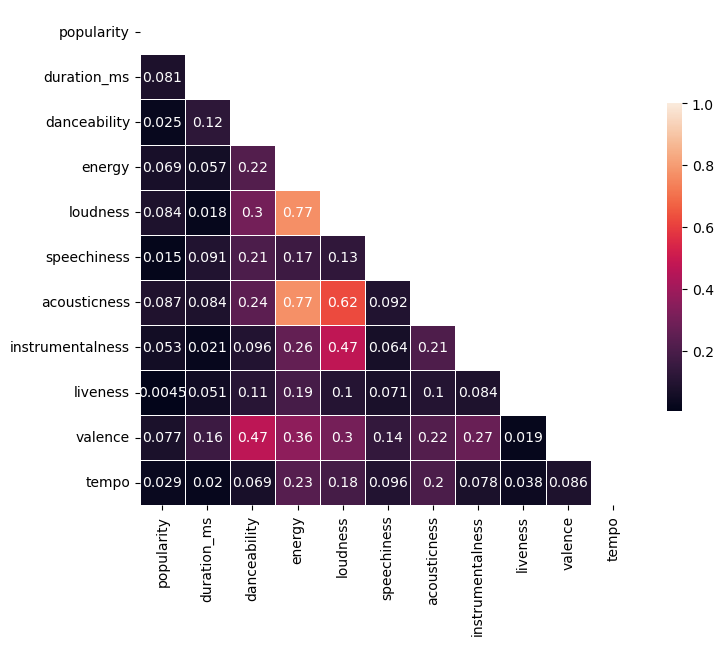

In [11]:
corr=np.abs(dfnum.corr())

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 8))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

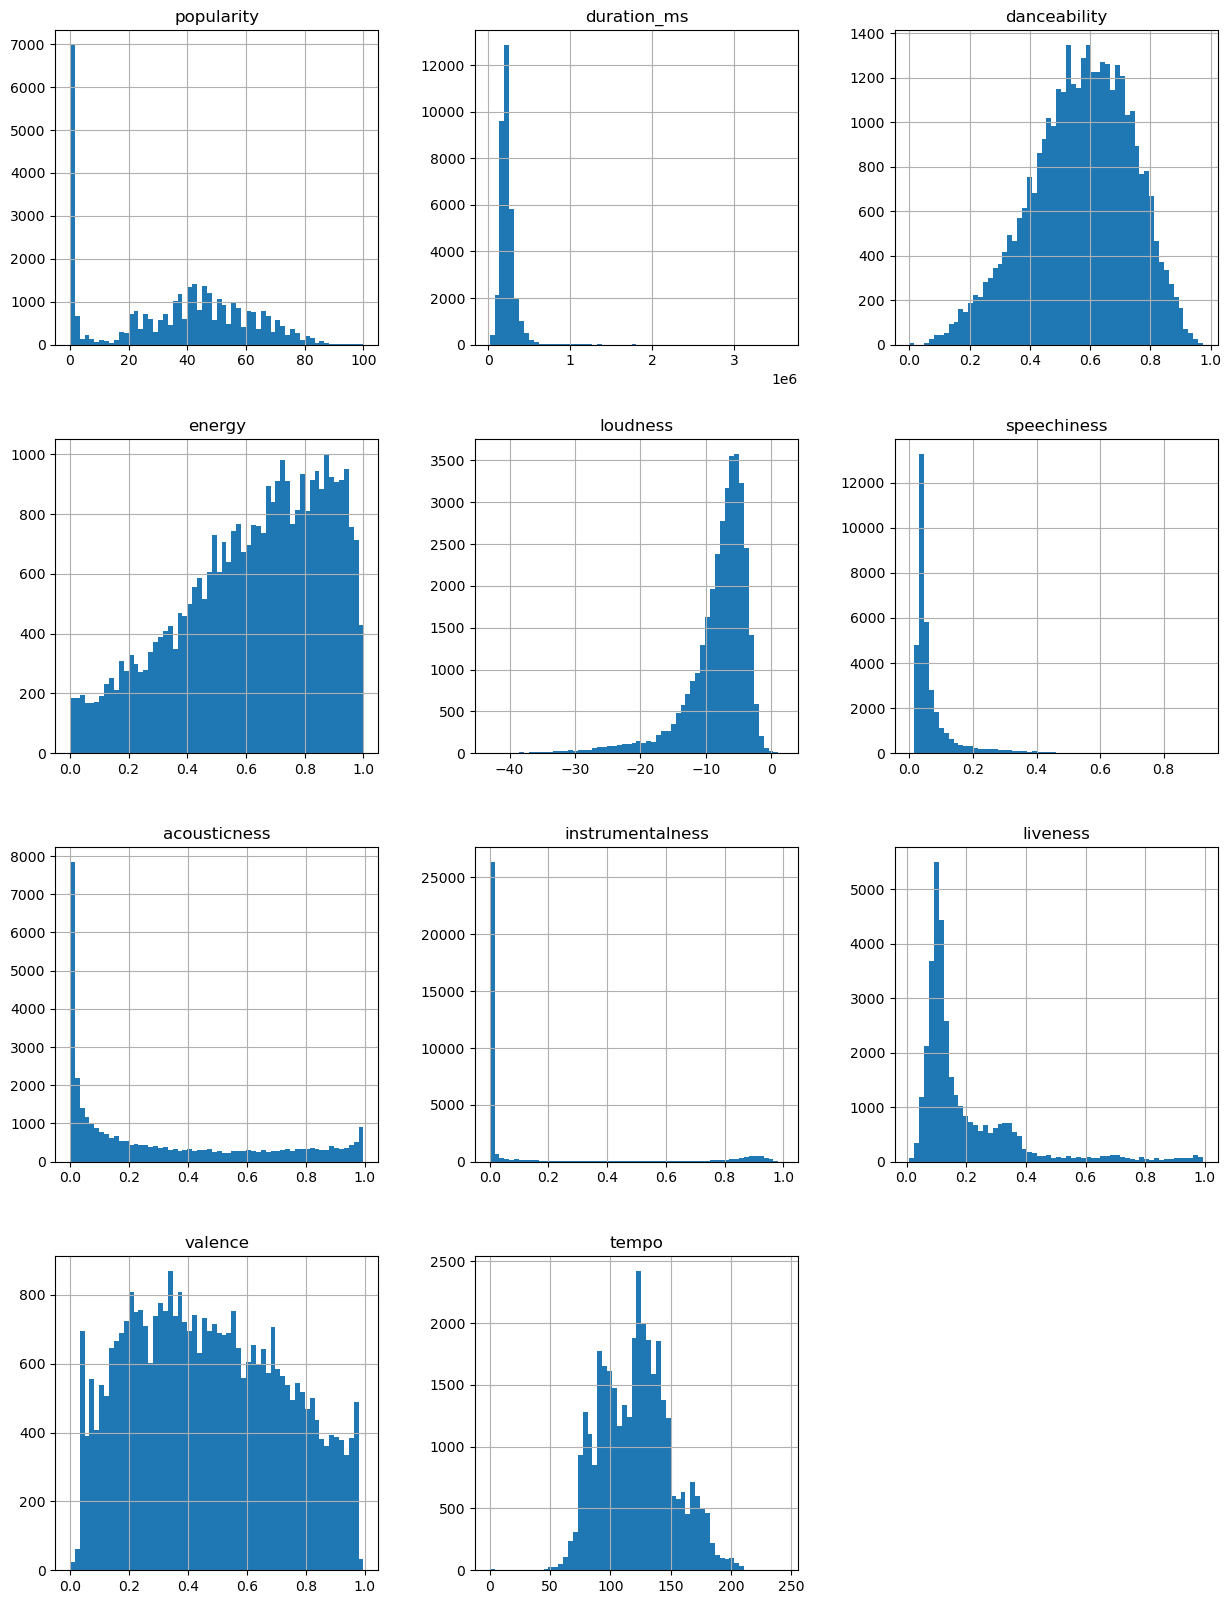

In [12]:
dfnum.hist(figsize=(15, 20), bins=60, xlabelsize=10, ylabelsize=10)
plt.show();

#### Categorical variables

The key column represents the key in which each musical piece is written (e.g 0 = C, 1 = C♯/D♭, 2 = D), therefore it needs to be treated as a categorical column.

In [13]:
df['key'].unique()

array([ 1,  0,  2,  6, 11,  8,  4,  7,  3, 10,  5,  9])

In [14]:
df['key'] = df['key'].astype('category')
key_dummies = pd.get_dummies(df['key'], prefix='key', drop_first=False, dtype=int)
df = pd.concat([df.drop(columns=['key']), key_dummies], axis=1)

In [15]:
df

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,loudness,...,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,-6.746,...,0,0,0,0,0,0,0,0,0,0
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,-17.235,...,0,0,0,0,0,0,0,0,0,0
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,-9.734,...,0,0,0,0,0,0,0,0,0,0
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,-18.515,...,0,0,0,0,0,0,0,0,0,0
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,-9.681,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34717,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,-16.393,...,0,0,0,1,0,0,0,0,0,0
34718,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,-18.318,...,0,0,0,0,0,0,0,0,0,0
34719,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,-10.895,...,0,0,0,0,0,0,0,0,0,0
34720,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,-10.889,...,0,0,0,0,0,1,0,0,0,0


Similarly, time signature is a categorical, as it refers to the number of beats per measure (3 could be 3/4 and 5 could be 5/4), which is more of a categorical characteristic.

In [16]:
df['time_signature'].unique()

array([4, 3, 1, 5, 0])

In [17]:
df['time_signature'].value_counts()

time_signature
4    31163
3     2788
5      464
1      296
0       11
Name: count, dtype: int64

In [18]:
df = df[df['time_signature']!=0].copy()
df['time_signature'] = df['time_signature'].astype('category')
ts_dummies = pd.get_dummies(df['time_signature'], prefix='time_signature', drop_first=False, dtype=int)
df = pd.concat([df.drop(columns=['time_signature']), ts_dummies], axis=1)

In [19]:
df

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,loudness,...,key_6,key_7,key_8,key_9,key_10,key_11,time_signature_1,time_signature_3,time_signature_4,time_signature_5
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,-6.746,...,0,0,0,0,0,0,0,0,1,0
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,-17.235,...,0,0,0,0,0,0,0,0,1,0
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,-9.734,...,0,0,0,0,0,0,0,0,1,0
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,-18.515,...,0,0,0,0,0,0,0,1,0,0
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,-9.681,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34717,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,-16.393,...,0,0,0,0,0,0,0,0,0,1
34718,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,-18.318,...,0,0,0,0,0,0,0,0,1,0
34719,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,-10.895,...,0,0,0,0,0,0,0,0,1,0
34720,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,-10.889,...,0,1,0,0,0,0,0,0,1,0
